In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook


<IPython.core.display.Javascript object>


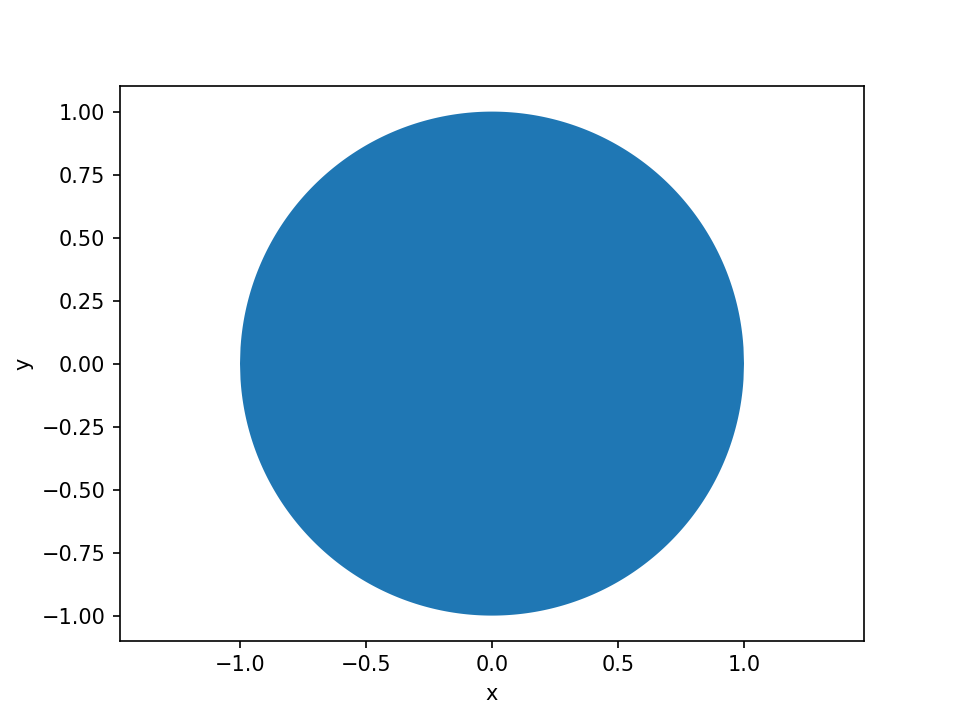

In [2]:
x_ = np.linspace(-1, 1, 1000)
semicircle = np.sqrt(1-x_**2)
plt.fill_between(x_, -semicircle, semicircle)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

### Gibbs sampling

<IPython.core.display.Javascript object>


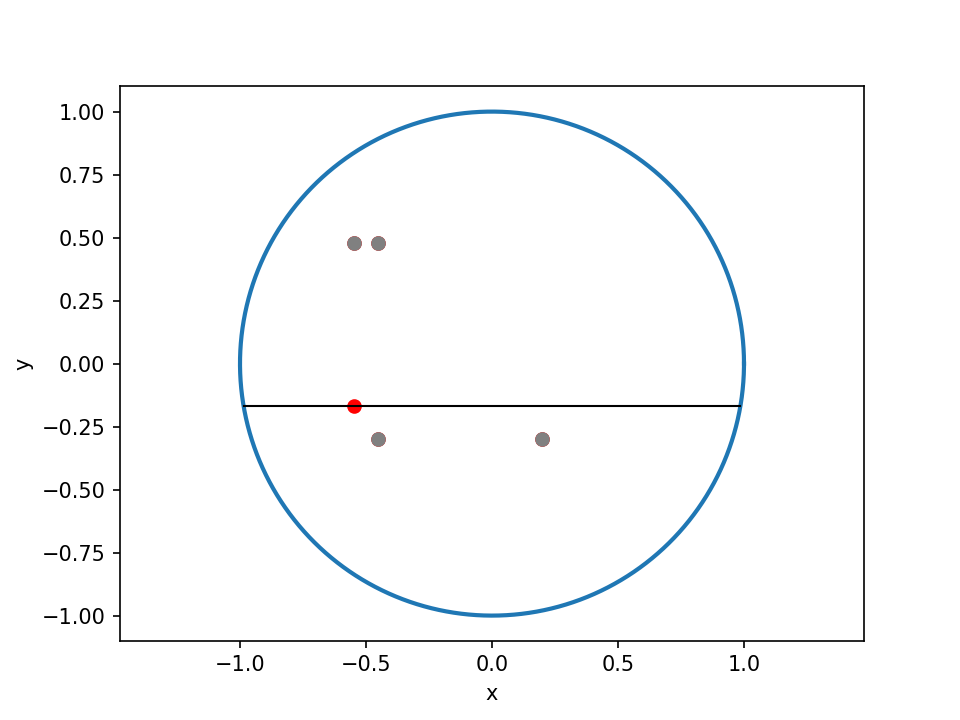

In [4]:
t = np.arange(0, 2 * np.pi, .001)

x_circ = np.cos(t)
y_circ = np.sin(t)

plt.figure()
plt.plot(x_circ, y_circ, lw=2)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
initial_point = np.array([0.2, -0.3])

x_val, y_val = initial_point

plt.scatter(x_val, y_val, color='red')
stage = 'find_x_dist_given_y'
line = None

In [13]:
### Interactive demo cell
# Keep running this over and over to generate points on the graph from the
# previous cell. Make sure you're using `%matplotlib notebook`
# Each time you run this cell, the variable `stage` controls which of the
# 4 if/elif blocks executes, and then changes it so that the next block
# will execute next time.

print(stage)
# Draw the horizontal line
if stage == "find_x_dist_given_y":
    if line:
        line.remove()
    x_max = np.sqrt(1 - y_val ** 2)
    x_min = -x_max
    # Draw horizontal line
    line,  = plt.plot([x_min, x_max], [y_val, y_val], color='black', lw=1)
    stage = 'sample_x_given_y'

# Sample a point
elif stage == 'sample_x_given_y':
    plt.scatter(x_val, y_val, color='gray')
    x_val = np.random.uniform(x_min, x_max)
    plt.scatter(x_val, y_val, color='red')
    stage = "find_y_dist_given_x"
    
# Draw the vertical line
elif stage == "find_y_dist_given_x":
    if line:
        line.remove()
    y_max = np.sqrt(1 - x_val ** 2)
    y_min = -y_max
    # Draw vertical line
    line,  = plt.plot([x_val, x_val], [y_min, y_max], color='black', lw=1)
    stage = 'sample_y_given_x'

# Sample a point
elif stage == 'sample_y_given_x':
    plt.scatter(x_val, y_val, color='gray')
    y_val = np.random.uniform(y_min, y_max)
    plt.scatter(x_val, y_val, color='red')
    stage = 'find_x_dist_given_y'


find_x_dist_given_y


In [ ]:
NUM_ITERATIONS = 500

x, y = [-0.1, 0.7]
samples = []

for i in range(500):
    # Sample x given y (hint: use Pythagorean theorem)
    x = ...
    samples.append([x, y])
    
    # Sample x2 given x1 similarly
    x = ...
    samples.append([x, y])
    
samples_arr = np.array(samples)
plt.figure()
plt.scatter(samples_arr[:, 0], samples_arr[:, 1], color='orange')
plt.axis('equal')